In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Text(0.5, 1.0, 'test2')

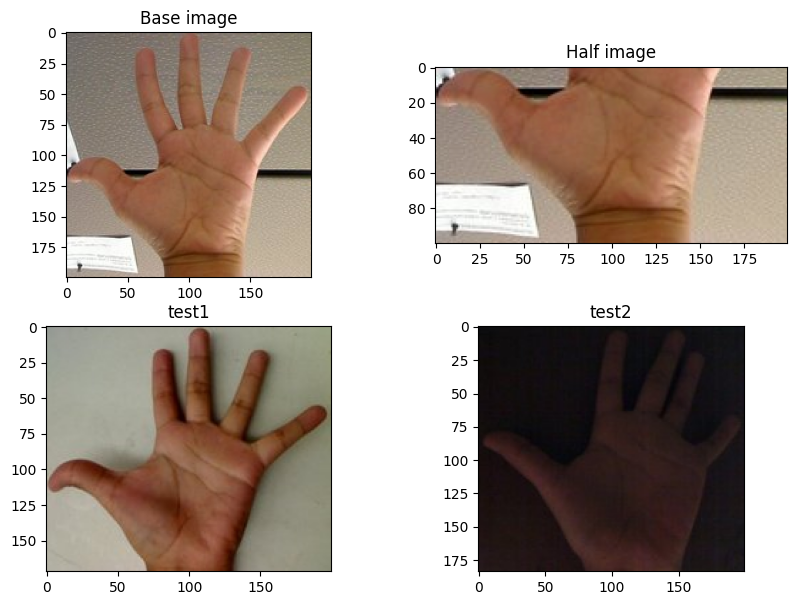

In [4]:
src_base = cv.imread(r"D:\Opencv\class.vision-master\images\Histogram_Comparison_Source_0.jpg")
src_test1 = cv.imread(r"D:\Opencv\class.vision-master\images\Histogram_Comparison_Source_1.jpg")
src_test2 = cv.imread(r"D:\Opencv\class.vision-master\images\Histogram_Comparison_Source_2.jpg")

hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2HSV)
hsv_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2HSV)

hsv_half_down = hsv_base[hsv_base.shape[0]//2:, :]

hist_base = cv.calcHist([hsv_base], [0,1], None, [100, 256], [0,100,0,256])
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_half_down = cv.calcHist([hsv_half_down], [0,1], None, [100,256], [0,100,0,256])
cv.normalize(hist_half_down, hist_half_down, 0, 1, cv.NORM_MINMAX)

hist_test1 = cv.calcHist([hsv_test1], [0,1], None, [100, 256], [0,100,0,256])
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test2 = cv.calcHist([hsv_test2], [0,1], None, [100, 256], [0,100,0,256])
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)


base_base = cv.compareHist(hist_base, hist_base, cv.HISTCMP_BHATTACHARYYA)
base_half = cv.compareHist(hist_base, hist_half_down, cv.HISTCMP_BHATTACHARYYA)
base_test1 = cv.compareHist(hist_base, hist_test1, cv.HISTCMP_BHATTACHARYYA)
base_test2 = cv.compareHist(hist_base, hist_test2, cv.HISTCMP_BHATTACHARYYA)

plt.figure(figsize=[10,7])
plt.subplot(221);plt.imshow(src_base[...,::-1]);plt.title("Base image")
plt.subplot(222);plt.imshow(cv.cvtColor(hsv_half_down, cv.COLOR_HSV2RGB));plt.title("Half image")
plt.subplot(223);plt.imshow(src_test1[...,::-1]);plt.title("test1")
plt.subplot(224);plt.imshow(src_test2[...,::-1]);plt.title("test2")

In [5]:
print(base_base, base_half, base_test1, base_test2)

0.0 0.3110258596926966 0.7492802340416971 0.9286733468430723
